In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv('drive/MyDrive/Placement_Data_Full_Class.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [ ]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
df['hsc_s'].value_counts()

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

In [ ]:
df['hsc_b'].value_counts()

Others     131
Central     84
Name: hsc_b, dtype: int64

In [ ]:
df['specialisation'].value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

In [ ]:
df['ssc_b'].value_counts()

Central    116
Others      99
Name: ssc_b, dtype: int64

In [ ]:
df['gender'].value_counts()

M    139
F     76
Name: gender, dtype: int64

In [ ]:
df['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [ ]:
df['degree_t'].value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# df[['hsc_s','hsc_b','ssc_b','gender','status']] = le.fit_transform(df[['hsc_s','hsc_b','ssc_b','gender','status']])
df['hsc_s'] = le.fit_transform(df['hsc_s'])
df['hsc_b'] = le.fit_transform(df['hsc_b'])
df['ssc_b'] = le.fit_transform(df['ssc_b'])
df['gender'] = le.fit_transform(df['gender'])
df['status'] = le.fit_transform(df['status'])
df['degree_t'] = le.fit_transform(df['degree_t'])
df['workex'] = le.fit_transform(df['workex'])
df['specialisation'] = le.fit_transform(df['specialisation'])

In [ ]:
df.head(1000)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,NaN
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [ ]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
df['salary'] = df['salary'].interpolate(method='pad')

In [ ]:
df.head(100)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.00,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.50,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.00,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.00,1,59.43,0,250000.0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.80,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,1,73.00,0,78.00,1,1,65.00,0,1,95.46,0,62.16,1,420000.0
96,97,0,76.00,0,70.00,0,2,76.00,0,1,66.00,0,64.44,1,300000.0
97,98,0,70.50,0,62.50,1,1,61.00,0,0,93.91,0,69.03,0,300000.0
98,99,0,69.00,0,73.00,0,1,65.00,0,0,70.00,0,57.31,1,220000.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


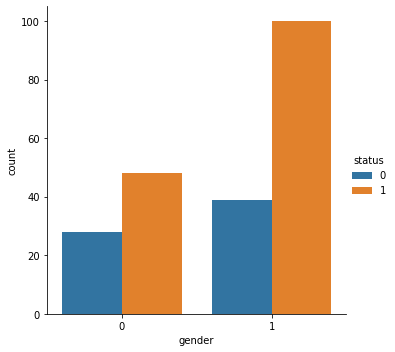

In [ ]:
sns.catplot('gender', data=df, kind='count', hue='status')

Text(9.924999999999997, 0.5, 'MBA%')

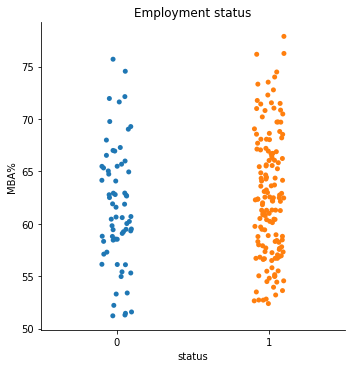

In [ ]:
sns.catplot(x = 'status', y = 'mba_p', data= df)
plt.title('Employment status')
plt.ylabel('MBA%')

Text(10.049999999999997, 0.5, 'SCC%')

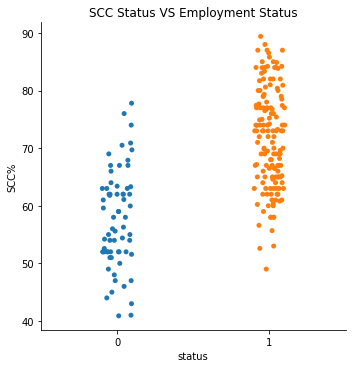

In [ ]:
sns.catplot(x = 'status', y= 'ssc_p', data = df)
plt.title('SCC Status VS Employment Status')
plt.ylabel('SCC%')

In [ ]:
X = df.drop(['status'], axis =1)
y = df['status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest = forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

print('Acc:', forest.score(X_train, y_train))
print('F1-score', f1_score(y_test, y_pred))

Acc: 1.0
F1-score 0.9206349206349206


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg = logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Acc:', logreg.score(X_train, y_train))
print('F1-Score:', f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred)) 
print(confusion_matrix(y_test, y_pred))

Acc: 0.8372093023255814
F1-Score: 0.90625
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        11
           1       0.91      0.91      0.91        32

    accuracy                           0.86        43
   macro avg       0.82      0.82      0.82        43
weighted avg       0.86      0.86      0.86        43

[[ 8  3]
 [ 3 29]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
